# Setting up Connection

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session, create_session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measures', 'stations']

In [4]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()

['measures', 'stations']

# Create a Session

In [5]:
# create a session
session = create_session(bind = engine)
measures = Base.classes.measures
stations = Base.classes.stations

# Precepitation Analysis

### 1. retrieve the last 12 months of precipitation data.

In [17]:
session.query(measures.date).first()

('2010-01-01')

In [18]:
# Query for all dates matching the 
# following date format
date_str = "2017-04-09"
prcp_query = session.query(measures.date, measures.prcp).\
    filter(measures.date > date_str).\
    order_by(measures.date).all()

In [28]:
import pandas as pd
prcp_df = pd.DataFrame(prcp_query).set_index('date')

## Plot of Precipitation in Hawaii for the past year

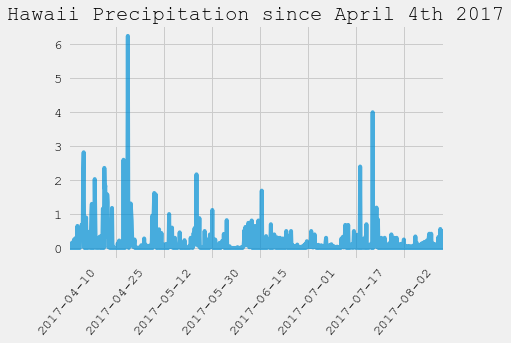

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
prcp_plot = prcp_df.plot(kind="line", title="Hawaii Precipitation since April 4th 2017", legend=False,alpha=.7, rot=50)

plt.xlabel("")
plt.show()

## Summary Stats for Precipitation in Hawaii for the past year

In [58]:
prcp_df.describe()

,prcp
count,784.000000
mean,0.169216
std,0.426668
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.250000


## Total Number of Stations

In [66]:
num_stations = session.query(func.count(stations.id)).one()
print(f"There are {num_stations[0]} stations in the dataset")

There are 9 stations in the dataset


##  List the stations and observation counts in descending order and find the station with the most observations

In [91]:
# note figure out how to do this purely in ORM
obs_query = session.query(measures.station, func.count(measures.station)).\
group_by(measures.station).all()
obs_query[1]
obs_df = pd.DataFrame(obs_query, columns=['station','observations'])
sorted_df = obs_df.sort_values(by=['observations'],ascending=False)
top_obs = sorted_df.iloc[0,:]['station']
print(sorted_df)
print("\n")
print(f"Which station has the highest number of observations? station: {sorted_df.iloc[0,:]['station']}") 

       station  observations
6  USC00519281          2772
7  USC00519397          2724
1  USC00513117          2709
8  USC00519523          2669
3  USC00516128          2612
2  USC00514830          2202
0  USC00511918          1979
4  USC00517948          1372
5  USC00518838           511


Which station has the highest number of observations? station: USC00519281


## retrieve the last 12 months of temperature observation data (tobs) and filter by the station with the most observations

In [94]:
# Query for all dates matching the 
# following date format
date_str = "2017-04-09"
tobs_query = session.query(measures.date, measures.tobs, measures.station).\
    filter(measures.date > date_str).\
    filter(measures.station == top_obs).\
    order_by(measures.date).all()
tobs_df = pd.DataFrame(tobs_query).set_index('date')
tobs_df.head()

,tobs,station
date,,
2017-04-10,67,USC00519281
2017-04-11,70,USC00519281
2017-04-12,69,USC00519281
2017-04-13,69,USC00519281
2017-04-14,74,USC00519281


## Plot the results as a histogram 

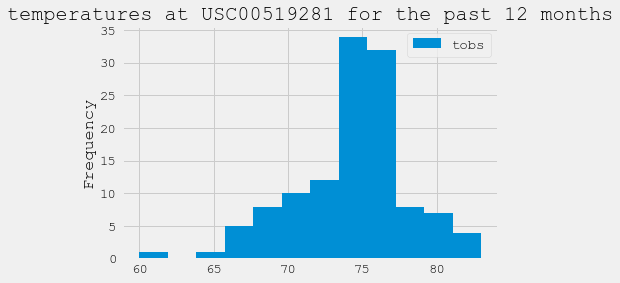

In [96]:
tobs_df.plot(kind='hist', bins=12, title=f'temperatures at {top_obs} for the past 12 months')

# Temperature Analysis

### Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

In [182]:
import numpy as np
def calc_temps(start, end):
    # convert to datetime objects
    start = func.strftime("%Y-%m-%d",start)
    end = func.strftime("%Y-%m-%d", end)


    # run query
    results = session.query(measures.tobs).\
        filter(func.strftime("%Y-%m-%d", measures.date) >= start).\
        filter(func.strftime("%Y-%m-%d", measures.date) <= end).\
        order_by(measures.date).all()
    avg = np.mean(results)
    min_ = np.min(results)
    max_ = np.max(results)

    return avg, min_, max_
# test with raw inputs
start = "2016-10-23"
end = "2016-11-08"

avg, *stats = calc_temps(start, end)



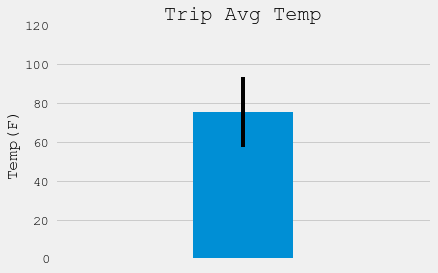

In [214]:
fig = plt.figure()
s = fig.add_subplot(111)
#the yerr has to take in a single value not a range
s.bar(1.5, avg, yerr=(stats[1] - stats[0]))
s.set_ylim(0,120)
s.set_xlim(0,3)

s.get_xaxis().set_visible(False)
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')
plt.show()

## Calculate the rainfall per weather station using the previous year's matching dates.

In [216]:
#retrieve year to date range
from datetime import datetime
from dateutil.relativedelta import relativedelta
last_year = datetime.now() - relativedelta(year=1)

# Create string of month name and year...
text = format(last_month, '%B %Y')

2017


In [ ]:
session.query(measures.prcp).\
        filter(func.strftime("%Y-%m-%d", measures.date) >= f"").\
        filter(func.strftime("%Y-%m-%d", measures.date) <= end).\
        order_by(measures.date).all()